# LOGISTIC REGRESSION FROM SCRATCH 😀

In [1]:
import numpy as np 
import pandas as pd 
import random

In [2]:
df = pd.DataFrame(np.random.randint(low=0, high=100, size=(120, 2)), columns=['X', 'Y'])

In [3]:
df['Sum'] = df['X'] + df['Y']
def classes(c):
    if c['Sum'] > 80 :
        return 'Even'
    else:
        return 'Odd'


df['Class'] = df.apply(classes, axis=1)
data=df.drop('Sum',axis=1)
data['Class'] = data[['Class']].replace(['Odd','Even'],[1,0])

### Sum is even => Class 0
### Sum is odd    => Class 1

In [4]:
data.head(4)

,X,Y,Class
0,73,40,0
1,92,53,0
2,76,72,0
3,97,6,0


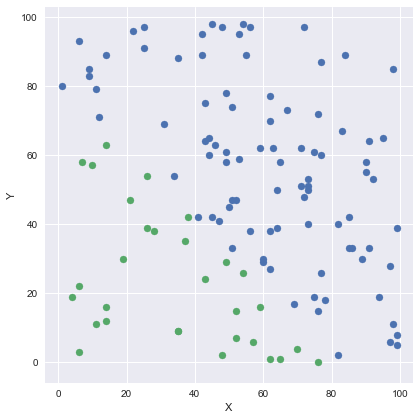

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.FacetGrid(data, hue="Class", size=6).map(plt.scatter, "X", "Y")
plt.show()

# Logistic Regression:

Logistic regression uses an equation as the representation, very much like linear regression.

Input values (x) are combined linearly using weights or coefficient values (referred to as the Greek capital letter Beta) to predict an output value (y). A key difference from linear regression is that the output value being modeled is a binary values (0 or 1) rather than a numeric value.

For this dataset, the logistic regression has three coefficients just like linear regression, for example:

** output = b0 + b1*x1 +b2x2 **

The job of the learning algorithm will be to discover the best values for the coefficients (b0, b1 and b2) based on the training data.

Unlike linear regression, the output is transformed into a probability using the logistic function:

** p(class=0) = 1 / (1 + e^(-output)) **



In [6]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

Calculate the Predictions

In [7]:
# Assign the weights to zero
b0 = 0 
b1 = 0
b2= 0

#The inputs X1 ans X2
x1 = 63
x2 = 95

#The output Class
y = 0

z = b0 + b1*x1 + b2*x2
print(sigmoid(z))

0.5


## Updating Parameters
We can calculate the new coefficient values using a simple update equation.

**b = b + alpha * (y – prediction) * prediction * (1 – prediction) * x **

Where b is the coefficient we are updating and prediction is the output of making a prediction using the model.


You will notice that the B0 does not have an input. This coefficient is often called the bias or the intercept and we can assume it always has an input value of 1.0. 


In [8]:
## ALPHA = 0.3

b0 = b0 + 0.1 * (0-0.5) * 0.5 * (1 -0.5) * 1.0
b1 = b1 + 0.1 * (0 - 0.5) * 0.5 * (1 - 0.5) * 63
b2 = b2 + 0.1 * (0 - 0.5) * 0.5 * (1 - 0.5) * 95
print(b0,b1,b2)

-0.0125 -0.7875000000000001 -1.1875


** This is just one iteration **

In [9]:
train = data[:100]

In [10]:
# Assign the weights to zero
b0 = 0 
b1 = 0
b2= 0
for i in range(1000):

    for i in range(0,len(train)):

        #The inputs X1 ans X2
        x1 = train['X'][i]
        x2 = train['Y'][i]

        #The output Class
        y = train['Class'][i]

        #Prediction using Logistic regression
        z = b0 + b1*x1 + b2*x2
        prediction =(sigmoid(z))

        #Alpha is 0.1(LEARNING RATE)

        alpha = 0.1

        #Update Parameters
        b0 = b0 + alpha * (y - prediction) * prediction * (1 - prediction) * 1
        b1 = b1 + alpha * (y - prediction) * prediction * (1 - prediction) * x1
        b2 = b2 + alpha * (y - prediction) * prediction * (1 - prediction) * x2

In [38]:
def predict(x,y):
    if (b0 + b1*x + b2*y) < 30:
        return ("1")
    else:
        return ("0")

### Test Predictions after training the weights

In [12]:
test = data[100:120]

In [42]:
p=[]
for i in range(100,120):
    p.append(predict(test['X'][i],test['Y'][i]))

In [63]:
p= [int(i) for i in p]

In [46]:
a=list(test['Class'])

### Calculating test Accuracy 

In [66]:
right =0
wrong =0
for i in range(0,len(a)):
    if a[i] == p[i]:
        right+=1
    else:
        wrong+=1

In [80]:
print("ACCURACY ON TEST DATA:",right/len(a) * 100,"%")

ACCURACY ON TEST DATA: 90.0 %


In [74]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = eval(formula)
    plt.plot(x, y)  
    plt.show()

<Figure size 720x432 with 0 Axes>

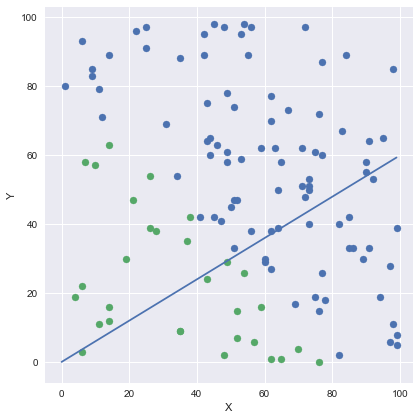

In [83]:
plt.figure(figsize=(10,6))
 
# Create plot
sns.FacetGrid(data, hue="Class", size=6).map(plt.scatter, "X", "Y")
 
graph('0.13461173599202347 + 0.597706770357658*x + 0.30706420343938673*y', range(0, 100))

## Still needs a whole lot of improvement....but this is just to get the basic idea :😀